# Data Processing for Temoa Models

Solution to bar graph hatches from [here](https://stackoverflow.com/questions/22833404/how-do-i-plot-hatched-bars-using-pandas/48507993)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.dates as mdates

years = [i for i in range(2021, 2031)]
idx = np.asarray([i for i in range(len(years))])
plt.rcParams['figure.figsize'] = (12,9)
plt.rcParams['figure.edgecolor'] = 'k'
plt.rcParams['figure.facecolor'] = 'w'
bau_path = "~/research/experiments/bottomupv2/09-adds_co2activity/"

In [2]:
bau_emissions = read_csv(bau_path+"bau_emissions.csv", parse_dates=True, index_col='Technologies')
bau_emissions

,ABBOTT,IMPELC
Technologies,,
2021-01-01,216.567470,226.034044
2022-01-01,219.968619,211.451571
2023-01-01,223.369768,211.562347
2024-01-01,226.870321,211.669125
2025-01-01,230.342124,211.789441
2026-01-01,233.871423,211.882680
2027-01-01,211.019603,234.914722
2028-01-01,212.039293,225.313713
2029-01-01,215.639247,222.892727


In [3]:
len(bau_emissions)

10

In [4]:
bau_activity = read_csv(bau_path+"bau_activity.csv", parse_dates=True, index_col='Year')
bau_activity

,IMPELC,IMPSOL,IMPWIND,TURBINE,IMPELC-2014,TURBINE-2014
Year,,,,,,
2014-01-01,0.000000,0.00,0.000000,0.000000,199.788,275.919
2021-01-01,273.980659,6.88,23.350000,174.489341,0.000,0.000
2022-01-01,256.304934,24.69,23.350000,178.355065,0.000,0.000
2023-01-01,256.439209,24.69,23.350000,182.220790,0.000,0.000
2024-01-01,256.568636,24.69,23.350000,186.191360,0.000,0.000
2025-01-01,256.714474,24.69,23.350000,190.145524,0.000,0.000
2026-01-01,256.827491,24.69,23.350000,194.132508,0.000,0.000
2027-01-01,284.745117,24.69,40.987940,152.776944,0.000,0.000
2028-01-01,273.107531,24.69,57.251934,152.450534,0.000,0.000


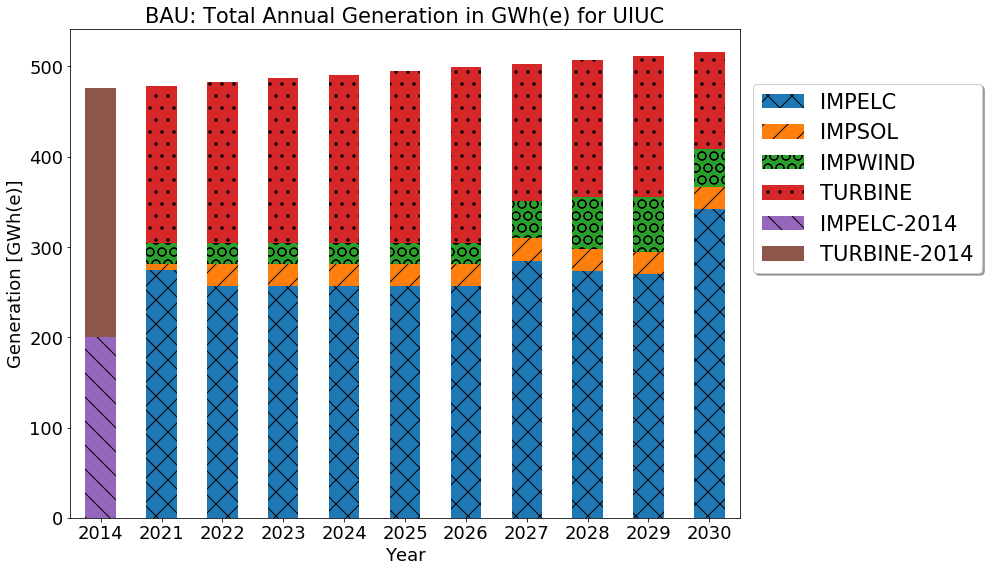

In [5]:
years_bau =[2014]+[i for i in range(2021, 2031)]
idx_bau = np.asarray([i for i in range(len(years_bau))])
ax = bau_activity.plot.bar(stacked=True)
plt.title("BAU: Total Annual Generation in GWh(e) for UIUC", fontsize=21)
plt.ylabel("Generation [GWh(e)]", fontsize=18)
plt.xlabel("Year", fontsize=18)

bars = ax.patches
hatches = ''.join(h*len(bau_activity) for h in 'x/O.\\')

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

ax.set_xticks(idx_bau)
ax.set_xticklabels(years_bau, rotation=0, fontsize=18)
plt.yticks(fontsize=18)
ax.legend(loc=(1.02,0.5),fancybox=True, shadow=True, fontsize=12,prop={'size': 21})
plt.show()

In [6]:
bau_emissions['total'] = bau_emissions['ABBOTT'] + bau_emissions['IMPELC']
bau_emissions

,ABBOTT,IMPELC,total
Technologies,,,
2021-01-01,216.567470,226.034044,442.601514
2022-01-01,219.968619,211.451571,431.420190
2023-01-01,223.369768,211.562347,434.932115
2024-01-01,226.870321,211.669125,438.539445
2025-01-01,230.342124,211.789441,442.131565
2026-01-01,233.871423,211.882680,445.754103
2027-01-01,211.019603,234.914722,445.934324
2028-01-01,212.039293,225.313713,437.353007
2029-01-01,215.639247,222.892727,438.531974


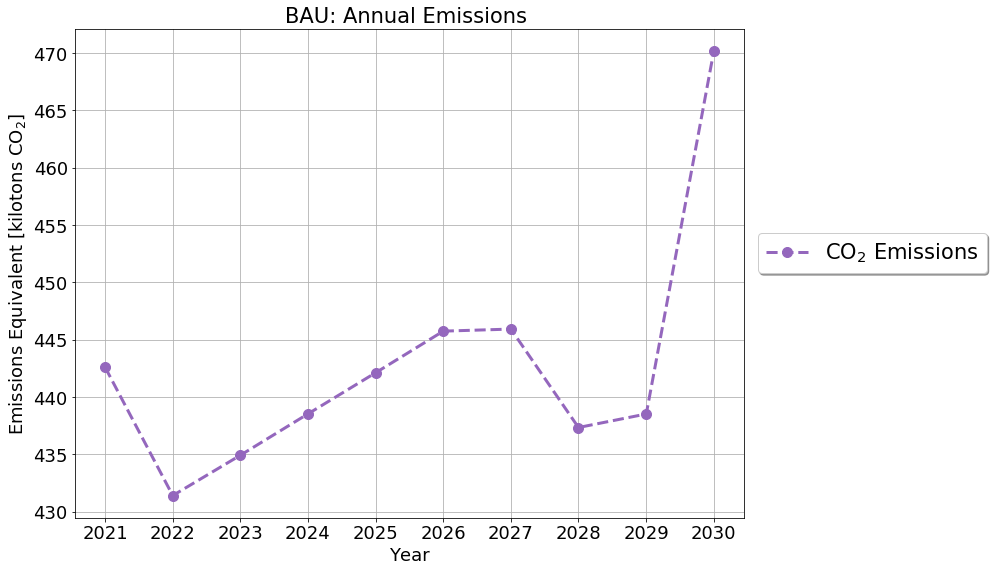

In [7]:
fig, ax = plt.subplots()

ax.plot(bau_emissions.index, 
         bau_emissions.total,
         lw=3, linestyle = '--',
         marker='o',
         markersize=10,
         color='tab:purple', 
         label='CO$_2$ Emissions')
plt.title('BAU: Annual Emissions ', fontsize=21)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Emissions Equivalent [kilotons CO$_2$]', fontsize=18)
# ax.set_xticks(idx)
# ax.set_xticklabels(years, rotation=65, fontsize=18)
ax.legend(loc=(1.02,0.5),fancybox=True, shadow=True, fontsize=12,prop={'size': 21})
plt.grid()
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

### The Nuclear Option

In [10]:
freenuclear_path = "~/research/experiments/bottomupv2/11-adds_emissionsLimit/"
costnuclear_path = "~/research/experiments/bottomupv2/12-nuclear_investcost/"
limitnuclear_path = "~/research/experiments/bottomupv2/13-nuclear_maxcapacity/"

#### Scenario 1: Zero Capital Costs

In [11]:
free_emissions = read_csv(freenuclear_path+"nuclear_emissions.csv", parse_dates=True, index_col='Year')
free_activity = read_csv(freenuclear_path+"nuclear_activity.csv", parse_dates=True, index_col='Year')

In [12]:
free_emissions['total'] = free_emissions['IMPELC']
free_emissions

,IMPELC,total
Year,,
2021-01-01,226.034044,226.034044
2022-01-01,195.715382,195.715382
2023-01-01,145.942923,145.942923
2024-01-01,147.156035,147.156035
2025-01-01,200.867639,200.867639
2026-01-01,202.601350,202.601350
2027-01-01,200.589015,200.589015
2028-01-01,152.088789,152.088789
2029-01-01,204.863835,204.863835


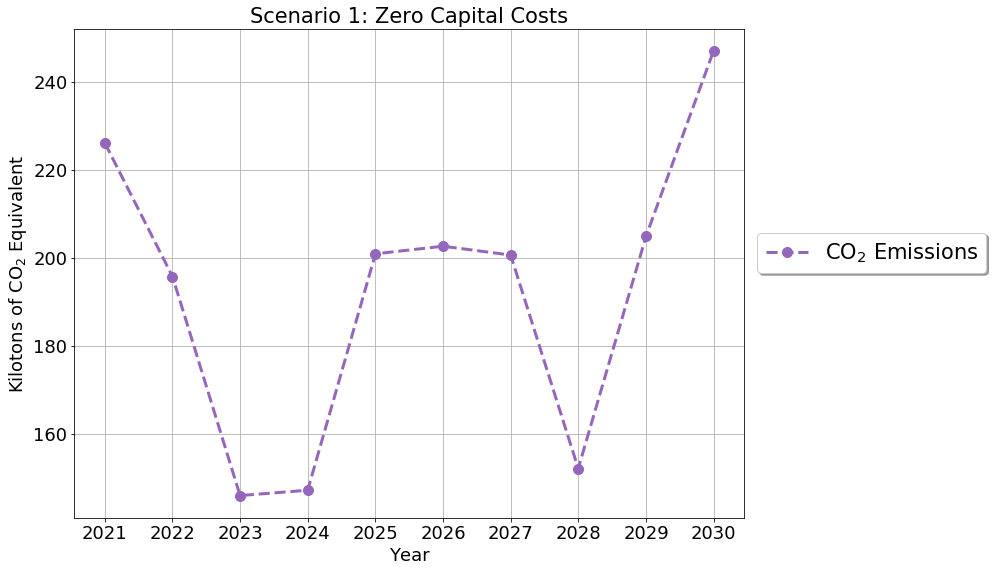

In [13]:
fig, ax = plt.subplots()

ax.plot(free_emissions.index, 
         free_emissions.total,
         lw=3, linestyle = '--',
         marker='o',
         markersize=10,
         color='tab:purple', 
         label='CO$_2$ Emissions')
plt.title('Scenario 1: Zero Capital Costs', fontsize=21)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Kilotons of CO$_2$ Equivalent', fontsize=18)
# ax.set_xticks(idx)
# ax.set_xticklabels(years, rotation=65, fontsize=18)
ax.legend(loc=(1.02,0.5),fancybox=True, shadow=True, fontsize=12,prop={'size': 21})
plt.grid()
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

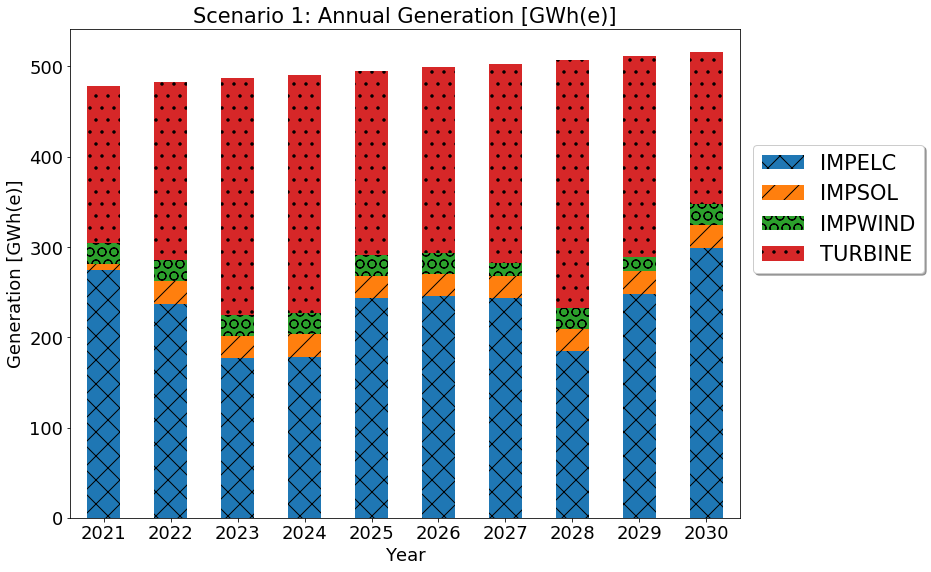

In [14]:
ax = free_activity.plot.bar(stacked=True)
plt.title("Scenario 1: Annual Generation [GWh(e)]", fontsize=21)
plt.ylabel("Generation [GWh(e)]", fontsize=18)
plt.xlabel("Year", fontsize=18)

bars = ax.patches
hatches = ''.join(h*len(free_activity) for h in 'x/O.')

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

ax.set_xticks(idx)
ax.set_xticklabels(years, rotation=0, fontsize=18)
plt.yticks(fontsize=18)
ax.legend(loc=(1.02,0.5),fancybox=True, shadow=True, fontsize=12,prop={'size': 21})
plt.show()

#### Scenario 2: No Size Limit

In [15]:
cost_emissions = read_csv(costnuclear_path+"nuclear_emissions.csv", parse_dates=True, index_col='Year')
cost_activity = read_csv(costnuclear_path+"nuclear_activity.csv", parse_dates=True, index_col='Year')

In [16]:
cost_emissions['total'] = cost_emissions['IMPELC'] + cost_emissions['ABBOTT']
cost_emissions

,ABBOTT,IMPELC,total
Year,,,
2021-01-01,199.814884,137.185117,337.000000
2022-01-01,0.000000,195.715382,195.715382
2023-01-01,0.000000,211.562347,211.562347
2024-01-01,0.000000,211.665693,211.665693
2025-01-01,0.000000,148.364098,148.364098
2026-01-01,0.000000,202.272872,202.272872
2027-01-01,0.000000,201.974656,201.974656
2028-01-01,0.000000,205.856859,205.856859
2029-01-01,0.000000,151.443343,151.443343


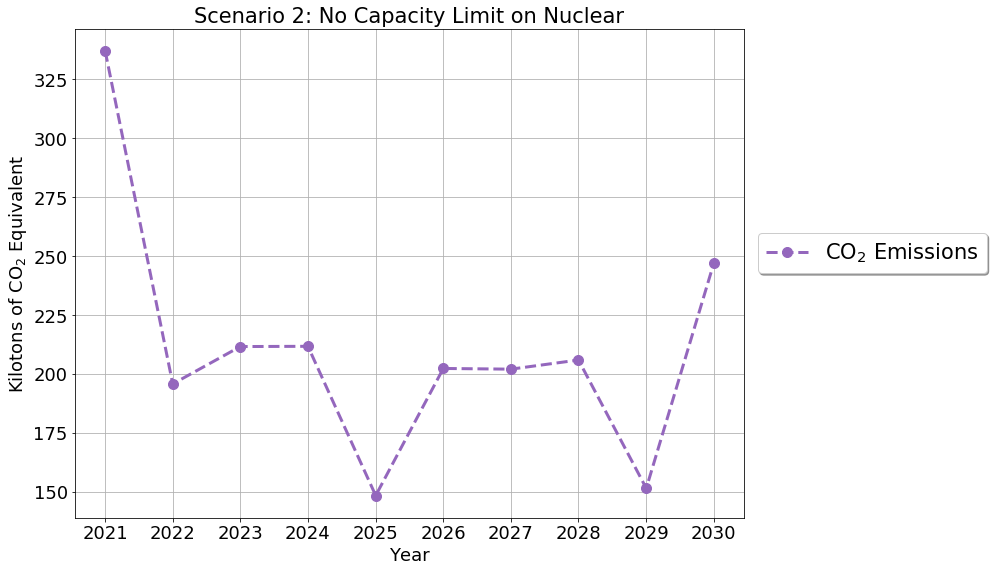

In [17]:
fig, ax = plt.subplots()

ax.plot(cost_emissions.index, 
         cost_emissions.total,
         lw=3, linestyle = '--',
         marker='o',
         markersize=10,
         color='tab:purple', 
         label='CO$_2$ Emissions')
plt.title('Scenario 2: No Capacity Limit on Nuclear', fontsize=21)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Kilotons of CO$_2$ Equivalent', fontsize=18)
# ax.set_xticks(idx)
# ax.set_xticklabels(years, rotation=65, fontsize=18)
ax.legend(loc=(1.02,0.5),fancybox=True, shadow=True, fontsize=12,prop={'size': 21})
plt.grid()
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

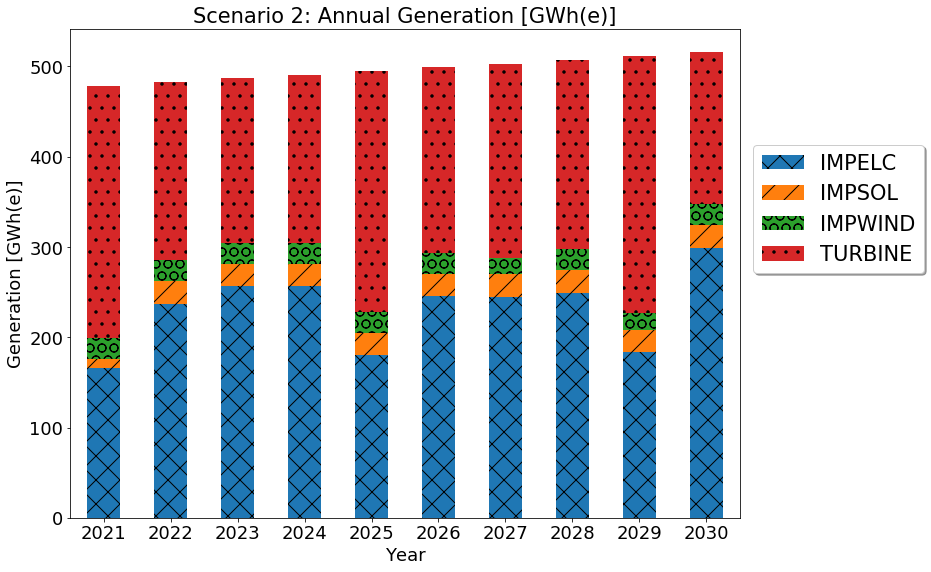

In [18]:
ax = cost_activity.plot.bar(stacked=True)
plt.title("Scenario 2: Annual Generation [GWh(e)]", fontsize=21)
plt.ylabel("Generation [GWh(e)]", fontsize=18)
plt.xlabel("Year", fontsize=18)

bars = ax.patches
hatches = ''.join(h*len(cost_activity) for h in 'x/O.')

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

ax.set_xticks(idx)
ax.set_xticklabels(years, rotation=0, fontsize=18)
plt.yticks(fontsize=18)
ax.legend(loc=(1.02,0.5),fancybox=True, shadow=True, fontsize=12,prop={'size': 21})
plt.show()

#### Scenario 3: Size Limited to Small Modular Reactor Size

In [19]:
limit_emissions = read_csv(limitnuclear_path+"nuclear_emissions.csv", parse_dates=True, index_col='Year')
limit_activity_stm = read_csv(limitnuclear_path+"nuclear_activity_stm.csv", parse_dates=True, index_col='Year')
limit_activity_elc = read_csv(limitnuclear_path+"nuclear_activity_elc.csv", parse_dates=True, index_col='Year')
limit_capacity_stm = read_csv(limitnuclear_path+"nuclear_capacity_industrial.csv", parse_dates=True, index_col='Year')
limit_capacity_elc = read_csv(limitnuclear_path+"nuclear_capacity_electric.csv", parse_dates=True, index_col='Year')

In [20]:
limit_emissions['total'] = limit_emissions['IMPELC'] + limit_emissions['ABBOTT']
limit_emissions

,ABBOTT,IMPELC,total
Year,,,
2021-01-01,199.814884,137.185117,337.000000
2022-01-01,118.168067,210.831934,329.000000
2023-01-01,105.437652,211.562347,317.000000
2024-01-01,101.339061,202.660939,304.000000
2025-01-01,90.741101,206.258901,297.000001
2026-01-01,109.015508,180.984493,290.000001
2027-01-01,143.291421,125.449542,268.740963
2028-01-01,92.981181,125.513873,218.495054
2029-01-01,73.572986,132.352322,205.925308


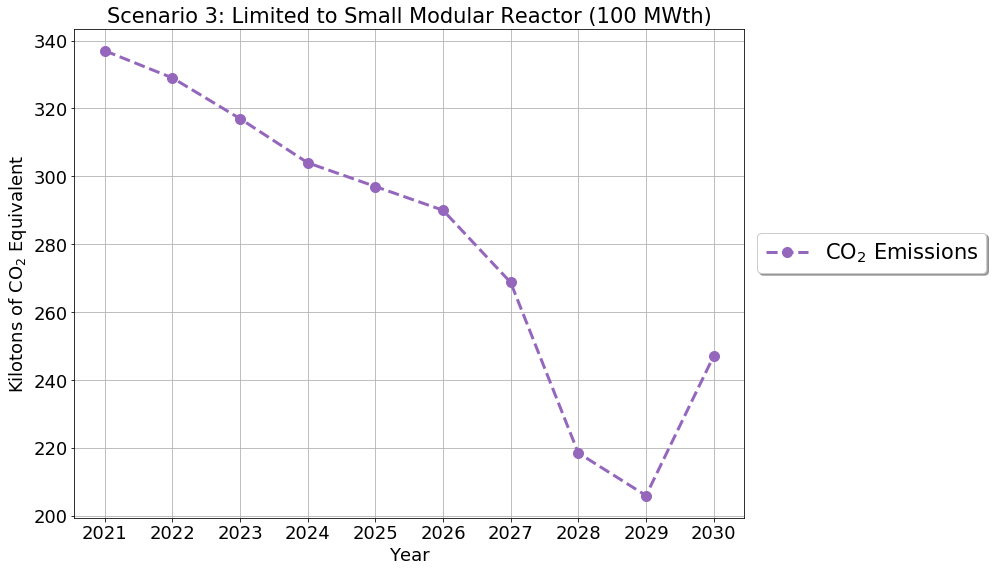

In [21]:
fig, ax = plt.subplots()

ax.plot(limit_emissions.index, 
         limit_emissions.total,
         lw=3, linestyle = '--',
         marker='o',
         markersize=10,
         color='tab:purple', 
         label='CO$_2$ Emissions')
plt.title('Scenario 3: Limited to Small Modular Reactor (100 MWth)', fontsize=21)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Kilotons of CO$_2$ Equivalent', fontsize=18)
# ax.set_xticks(idx)
# ax.set_xticklabels(years, rotation=65, fontsize=18)
ax.legend(loc=(1.02,0.5),fancybox=True, shadow=True, fontsize=12,prop={'size': 21})
plt.grid()
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

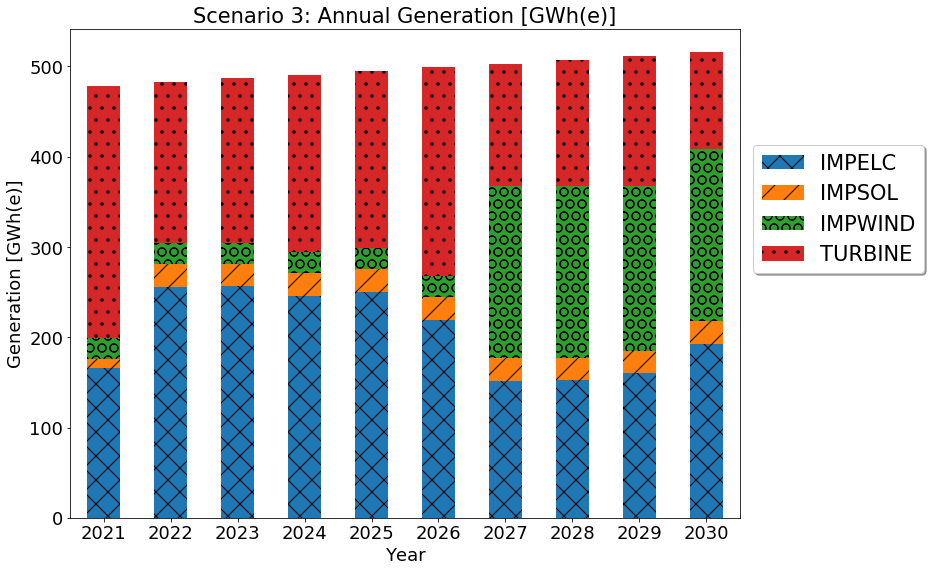

In [22]:
ax = limit_activity_elc.plot.bar(stacked=True)
plt.title("Scenario 3: Annual Generation [GWh(e)]", fontsize=21)
plt.ylabel("Generation [GWh(e)]", fontsize=18)
plt.xlabel("Year", fontsize=18)

bars = ax.patches
hatches = ''.join(h*len(limit_activity_elc) for h in 'x/O.')

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

ax.set_xticks(idx)
ax.set_xticklabels(years, rotation=0, fontsize=18)
plt.yticks(fontsize=18)
ax.legend(loc=(1.02,0.5),fancybox=True, shadow=True, fontsize=12,prop={'size': 21})
plt.show()

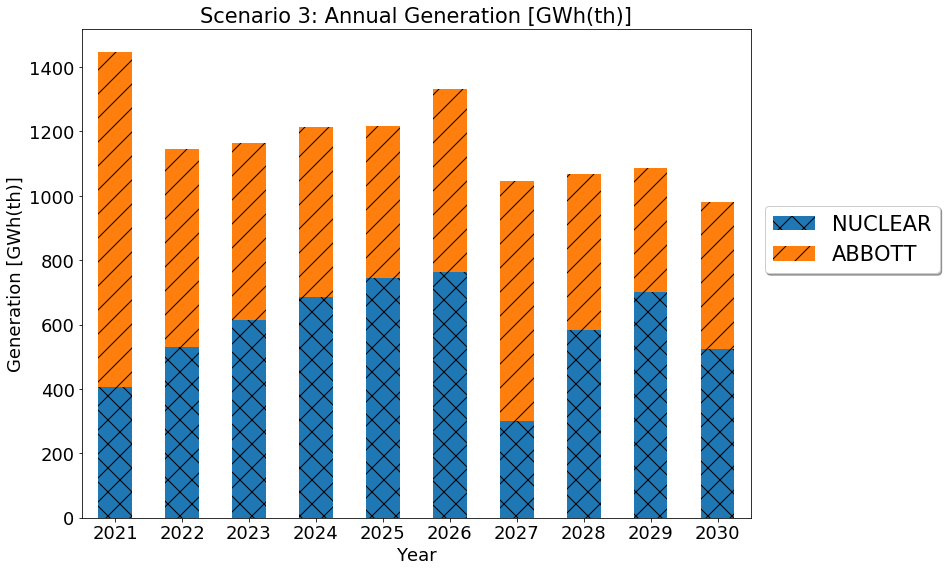

In [23]:
ax = limit_activity_stm.plot.bar(stacked=True)
plt.title("Scenario 3: Annual Generation [GWh(th)]", fontsize=21)
plt.ylabel("Generation [GWh(th)]", fontsize=18)
plt.xlabel("Year", fontsize=18)

bars = ax.patches
hatches = ''.join(h*len(limit_activity_stm) for h in 'x/O.')

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

ax.set_xticks(idx)
ax.set_xticklabels(years, rotation=0, fontsize=18)
plt.yticks(fontsize=18)
ax.legend(loc=(1.02,0.5),fancybox=True, shadow=True, fontsize=12,prop={'size': 21})
plt.show()

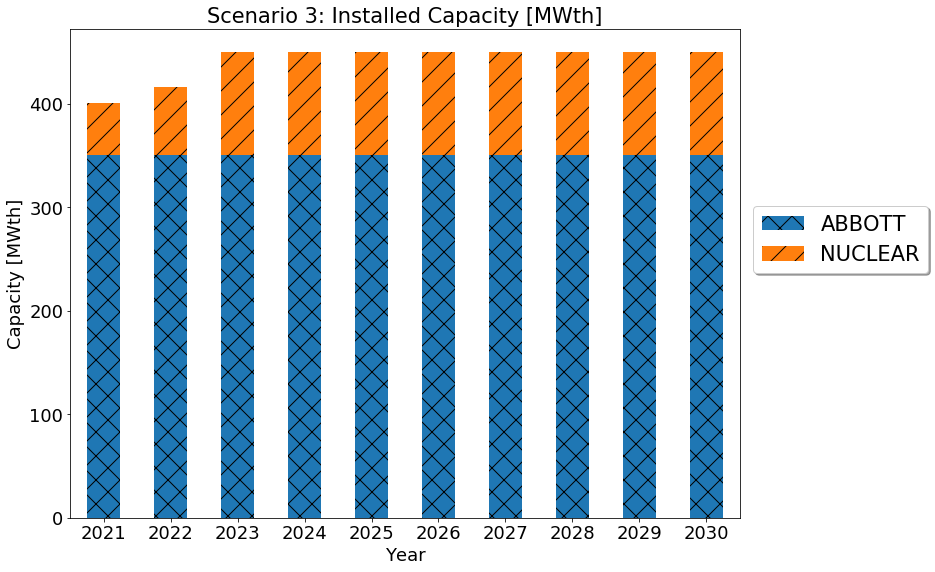

In [24]:
ax = limit_capacity_stm.plot.bar(stacked=True)
plt.title("Scenario 3: Installed Capacity [MWth]", fontsize=21)
plt.ylabel("Capacity [MWth]", fontsize=18)
plt.xlabel("Year", fontsize=18)

bars = ax.patches
hatches = ''.join(h*len(limit_capacity_stm) for h in 'x/O.')

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

ax.set_xticks(idx)
ax.set_xticklabels(years, rotation=0, fontsize=18)
plt.yticks(fontsize=18)
ax.legend(loc=(1.02,0.5),fancybox=True, shadow=True, fontsize=12,prop={'size': 21})
plt.show()

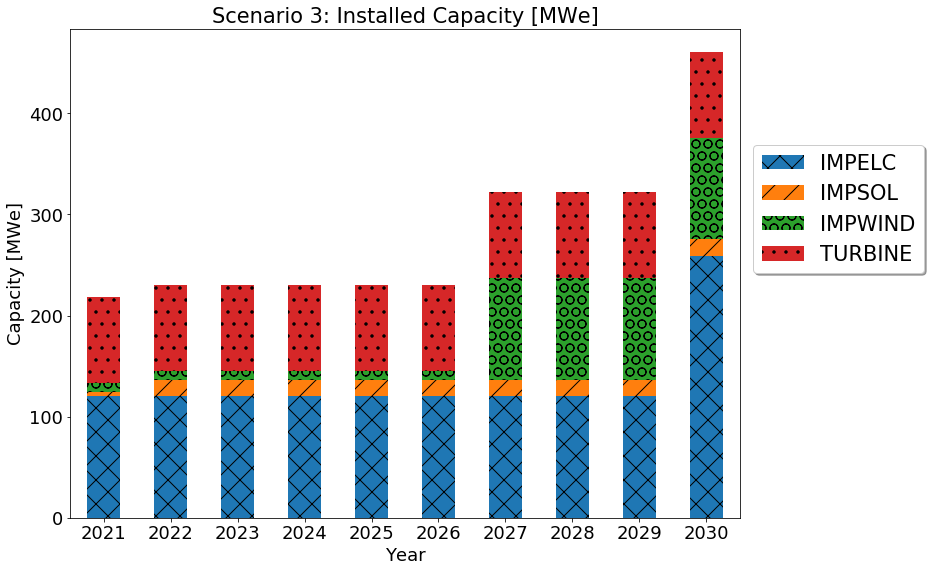

In [25]:
ax = limit_capacity_elc.plot.bar(stacked=True)
plt.title("Scenario 3: Installed Capacity [MWe]", fontsize=21)
plt.ylabel("Capacity [MWe]", fontsize=18)
plt.xlabel("Year", fontsize=18)

bars = ax.patches
hatches = ''.join(h*len(limit_capacity_stm) for h in 'x/O.')

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

ax.set_xticks(idx)
ax.set_xticklabels(years, rotation=0, fontsize=18)
plt.yticks(fontsize=18)
ax.legend(loc=(1.02,0.5),fancybox=True, shadow=True, fontsize=12,prop={'size': 21})
plt.show()

In [26]:
from data_parser import bar_plot
from data_parser import get_scenario_name
from data_parser import create_dataframe
from data_parser import parse_datalines
from data_parser import emissions_plot

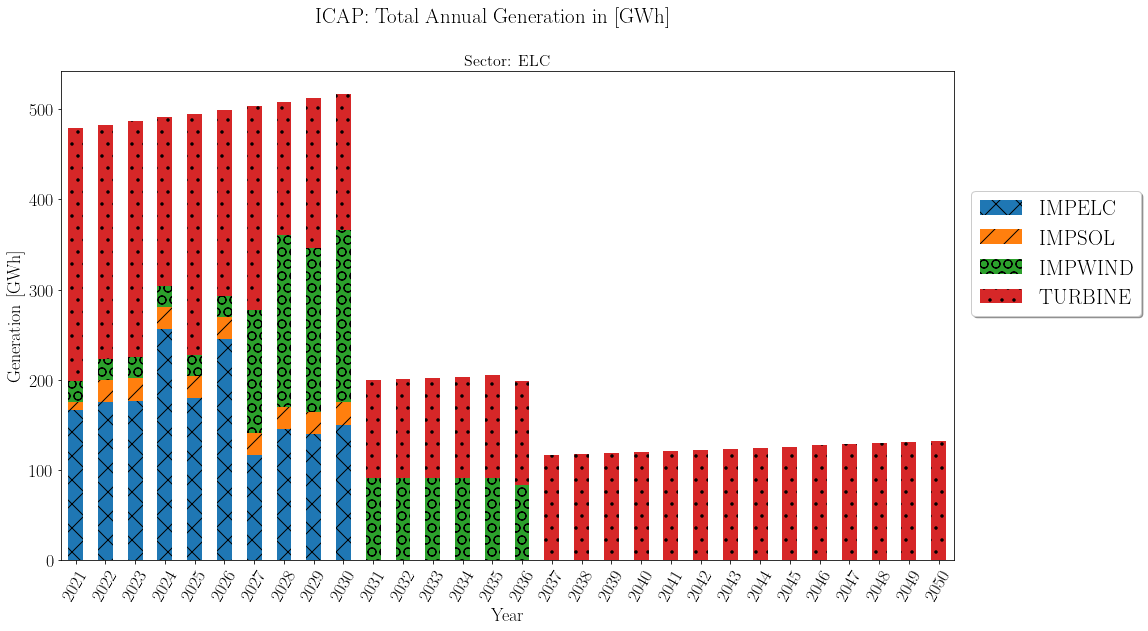

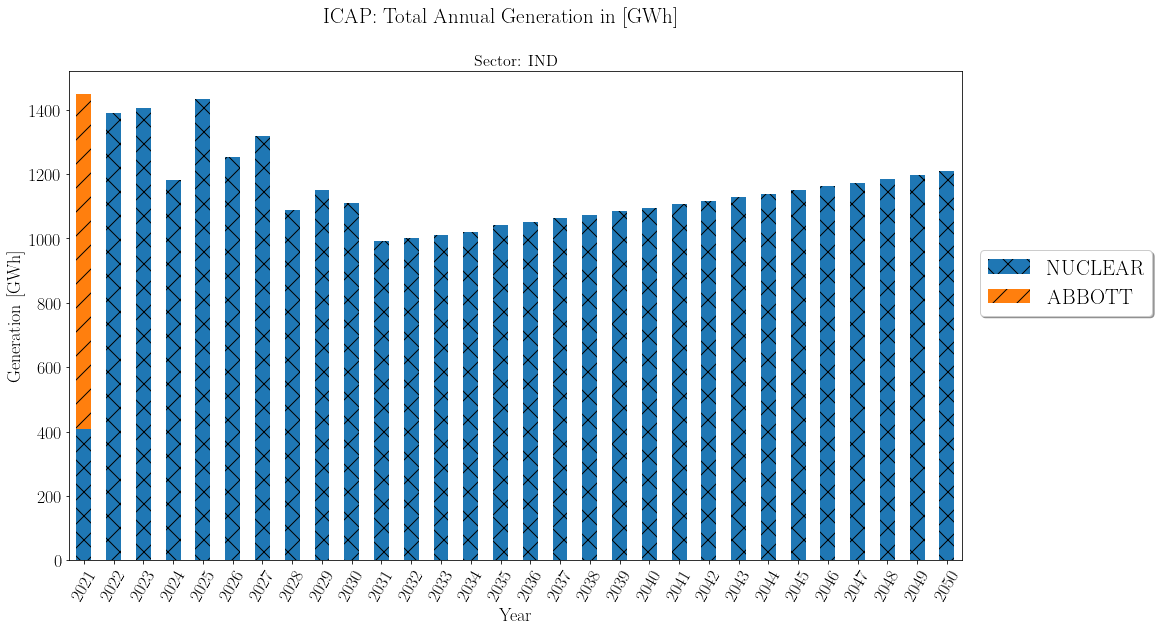

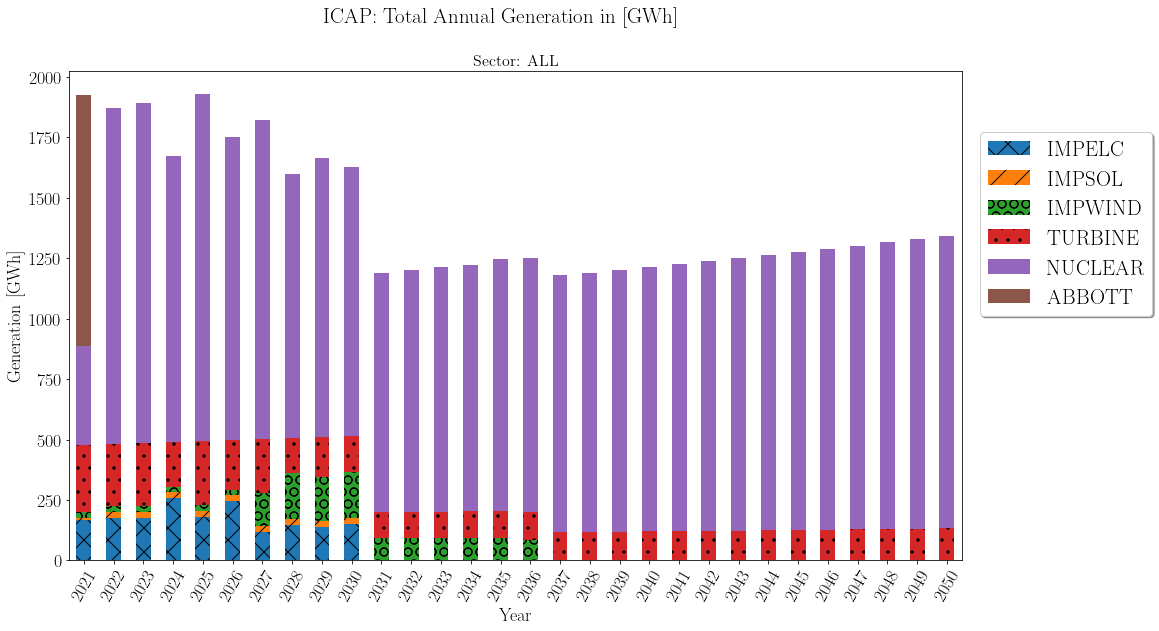

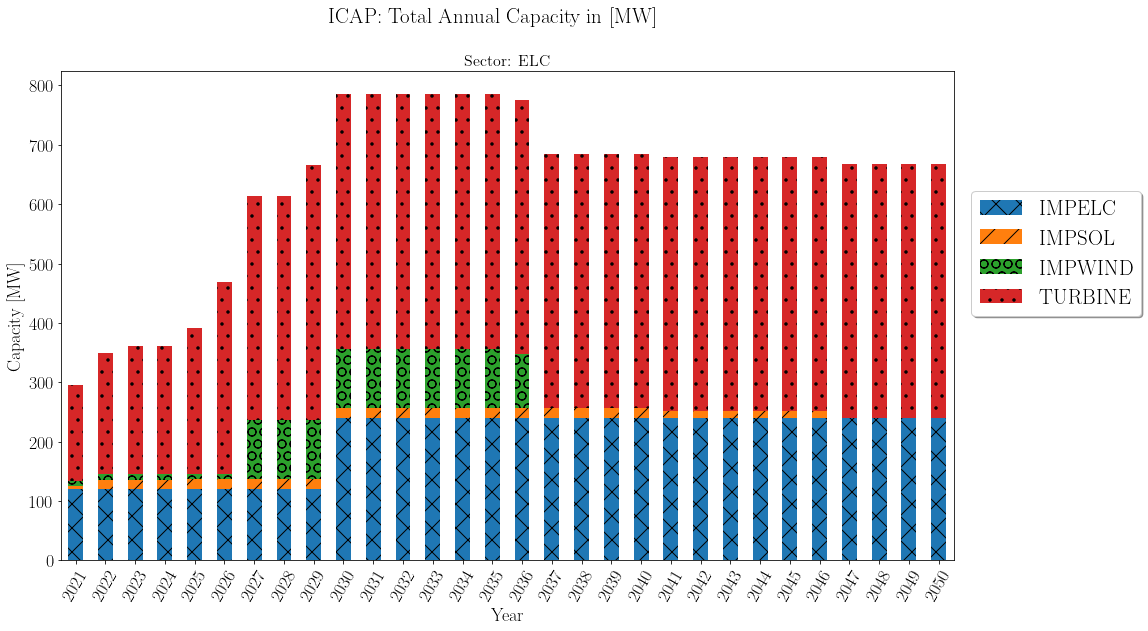

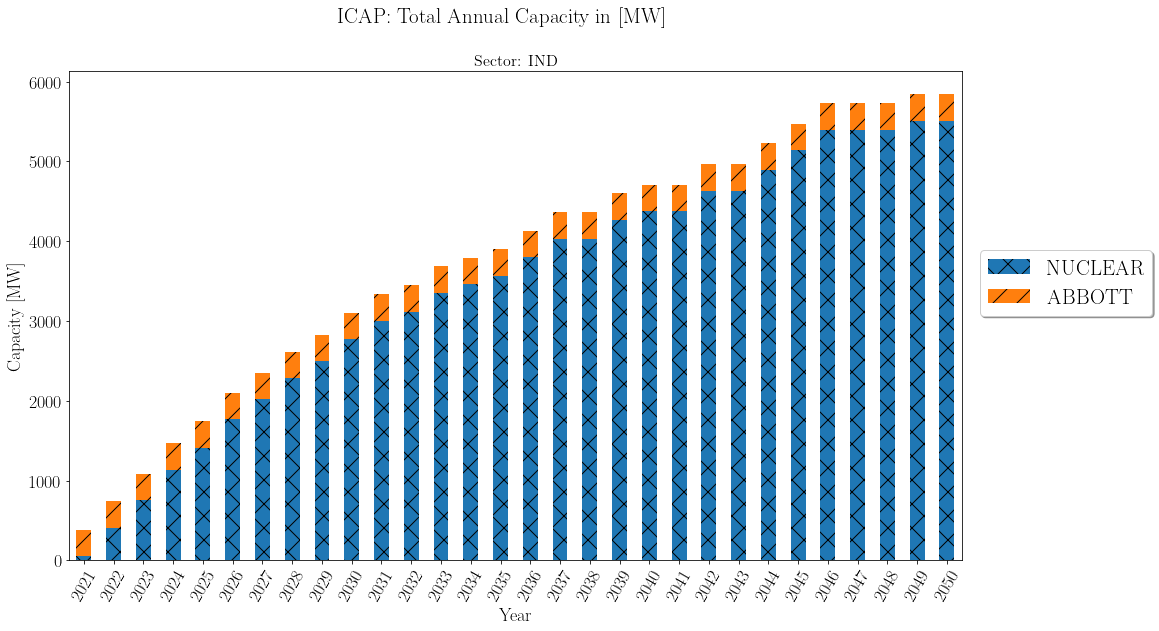

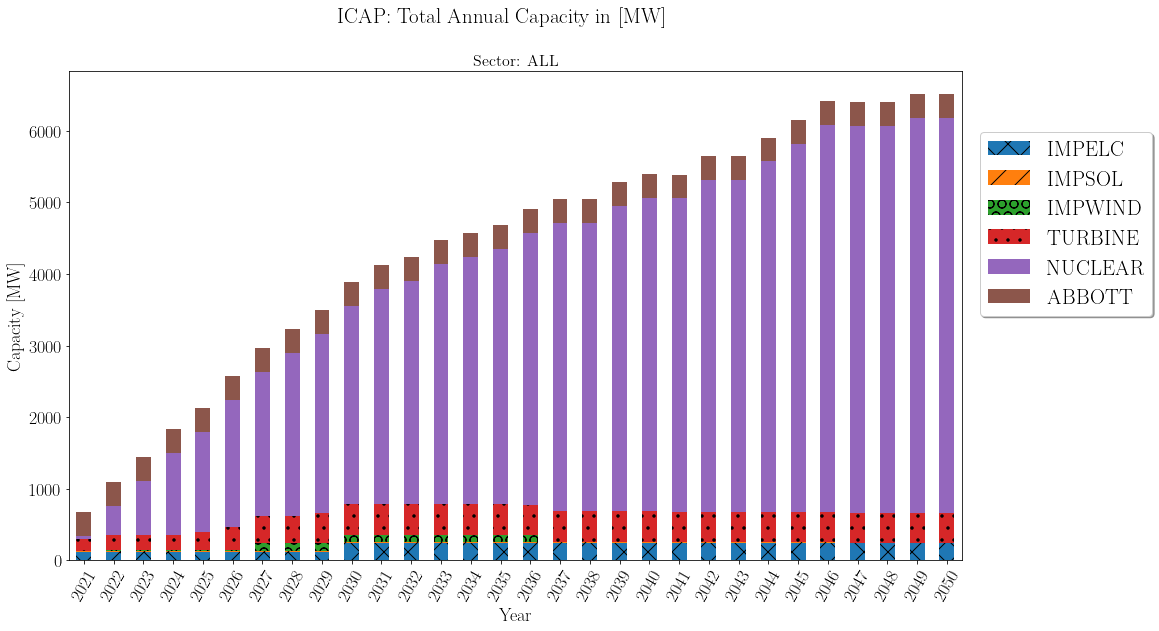

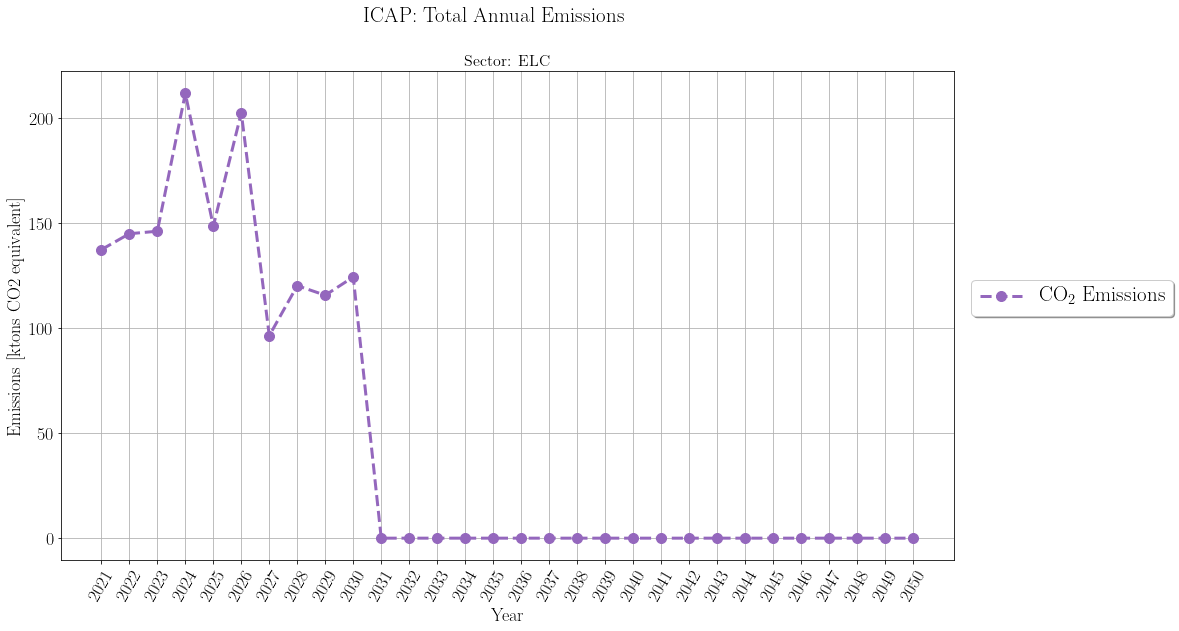

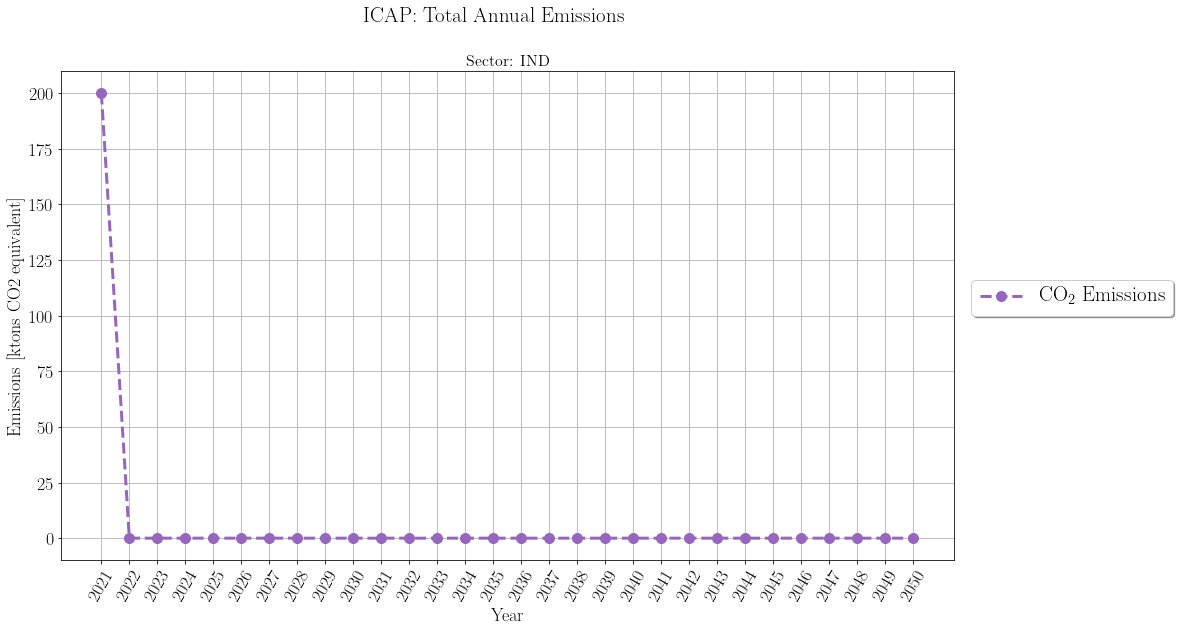

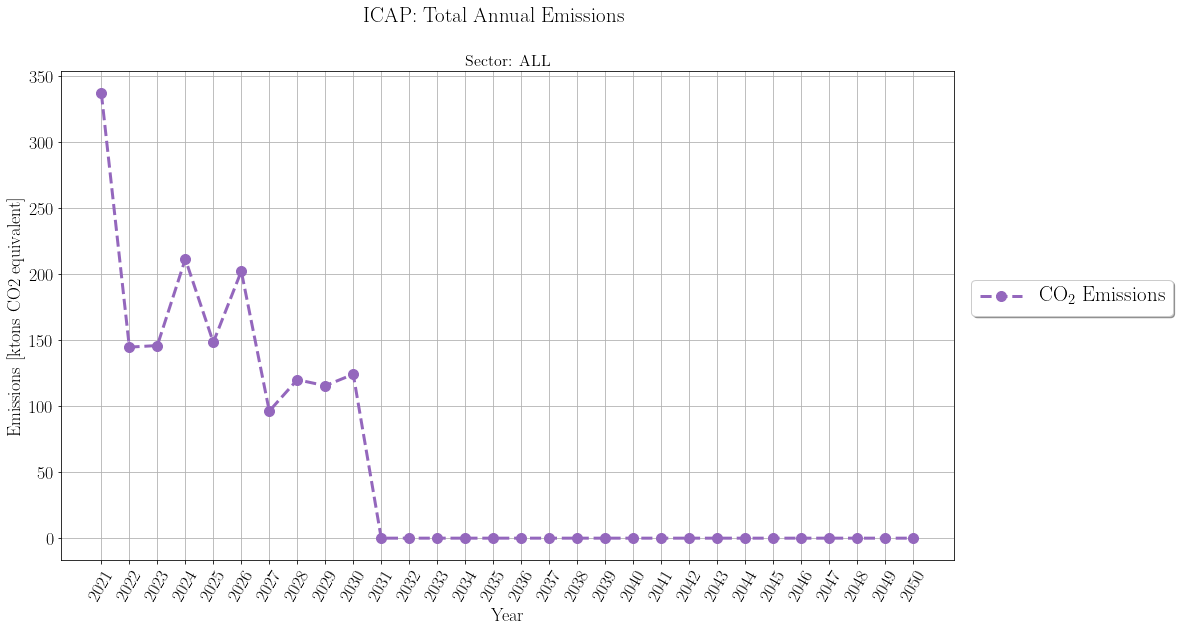

In [27]:
fpath = "/home/dotson/research/experiments/uiuc2050/icap_OutputLog.log"

years = np.arange(2021, 2051, 1)
variables = {'Generation': 'V_ActivityByPeriodAndProcess',
             'Capacity': 'V_Capacity',
             'Emissions': 'V_EmissionActivityByPeriodAndProcess'}
plots_dict = {'Emissions': emissions_plot,
              'Generation': bar_plot,
              'Capacity': bar_plot}

scenario = get_scenario_name(fpath)
datalines = parse_datalines(fpath)

for var in variables:
            # create dataframes
            df_elc = create_dataframe(datalines, var, sector='elc', years=years)
            df_ind = create_dataframe(datalines, var, sector='ind', years=years)
            df_all = create_dataframe(datalines, var, sector='all', years=years)
            plot = plots_dict[var]
            plot(dataframe=df_elc,
                 variable=var,
                 scenario=scenario,
                 sector='elc',
                 save=False)
            plot(dataframe=df_ind,
                 variable=var,
                 scenario=scenario,
                 sector='ind',
                 save=False)
            plot(dataframe=df_all,
                 variable=var,
                 scenario=scenario,
                 sector='all',
                 save=False)